In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-18.731160006769343 134.47633859357444
70.6113922781272 6.2564338922640275
-3.5166861195524604 38.89231145550923
78.41681651157771 -95.77055781636365
-81.15051957015547 -139.00678621181297
44.22025284416466 -146.46267981316493
-11.175761956221507 -155.77576945231215
48.309928788369206 -158.17070796699798
39.15767362300042 -19.904479901412117
0.1967601474668612 140.30156764669925
15.614727710025136 148.2211012015498
-60.12789773023367 176.86953867040165
-37.37109984599757 30.893151225762495
33.73947825126329 147.76626452295062
-34.713102036707355 31.471575133950125
-50.00641233522187 121.05576019051239
-48.504453932327976 -88.85373209113963
-43.22888804109041 -87.05927595697472
-0.37445923088735356 175.9653204718506
-20.33330272938933 -66.68914039427581
-35.37764415270722 -10.832092685823113
14.304253524868884 -109.42466113339387
10.80182443200178 133.2232027236554
12.609728187123565 84.33452702827526
23.706371109895855 -128.33178115370256
8.74016597859665 -139.6669611918935
55.88047583

In [17]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

603

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 2 of Set 1 | sorland
Processing Record 3 of Set 1 | voi
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | vanimo
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | tabukiniberu
City not found. Skipping...
Processing Record 18 of Set 1 | uyuni
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | meyungs
City not found. Skipping...
Processing Record 22 of Set 1 | katt

Processing Record 34 of Set 4 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 35 of Set 4 | rabo de peixe
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | bourail
Processing Record 38 of Set 4 | yangmei
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | moussoro
Processing Record 41 of Set 4 | nguiu
City not found. Skipping...
Processing Record 42 of Set 4 | gunjur
Processing Record 43 of Set 4 | pringsewu
Processing Record 44 of Set 4 | neiafu
Processing Record 45 of Set 4 | gamba
Processing Record 46 of Set 4 | boa viagem
Processing Record 47 of Set 4 | utrera
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | ust-nera
Processing Record 50 of Set 4 | biak
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | husavik
Processing Record 4 of Set 5 | romny
Processing Record 5 of Set 5 | kamenskoye
City not found. Skipping...
Processing Rec

Processing Record 21 of Set 8 | wanning
Processing Record 22 of Set 8 | beyneu
Processing Record 23 of Set 8 | rosetta
Processing Record 24 of Set 8 | boca do acre
Processing Record 25 of Set 8 | san fernando
Processing Record 26 of Set 8 | maraba
Processing Record 27 of Set 8 | kurilsk
Processing Record 28 of Set 8 | alanya
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | tambacounda
Processing Record 31 of Set 8 | atambua
Processing Record 32 of Set 8 | tiksi
Processing Record 33 of Set 8 | nizhnyaya tura
Processing Record 34 of Set 8 | fairview
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | yasnyy
Processing Record 37 of Set 8 | conakry
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | pingzhuang
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | jibuti
Processing Record 42 of Set 8 | bubaque
Processing Record 43 of Set 8 | tunduru
City not found. Skipping...
Processing Record 44 of Se

Processing Record 10 of Set 12 | igrim
Processing Record 11 of Set 12 | kavaratti
Processing Record 12 of Set 12 | linhares
Processing Record 13 of Set 12 | anjozorobe
Processing Record 14 of Set 12 | patzun
Processing Record 15 of Set 12 | palmer
Processing Record 16 of Set 12 | sarangani
Processing Record 17 of Set 12 | matsusaka
Processing Record 18 of Set 12 | ust-maya
Processing Record 19 of Set 12 | himora
City not found. Skipping...
Processing Record 20 of Set 12 | tame
Processing Record 21 of Set 12 | chateauroux
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | suhbaatar
Processing Record 24 of Set 12 | naze
Processing Record 25 of Set 12 | sola
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | shelburne
Processing Record 28 of Set 12 | minot
Processing Record 29 of Set 12 | tayzhina
Processing Record 30 of Set 12 | ossora
Processing Record 31 of Set 12 | belaya gora
Processing Record 32 of Set 12 | caravelas
Processing

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sorland,67.6670,12.6934,49.86,81,81,10.42,NO,2022-05-30 22:31:08
1,Voi,-3.3945,38.5630,67.62,90,32,7.34,KE,2022-05-30 22:31:09
2,Thompson,55.7435,-97.8558,48.36,93,100,11.50,CA,2022-05-30 22:26:29
3,Rikitea,-23.1203,-134.9692,74.46,77,49,7.94,PF,2022-05-30 22:31:09
4,Kodiak,57.7900,-152.4072,47.71,76,100,10.36,US,2022-05-30 22:31:10
5,Faanui,-16.4833,-151.7500,79.81,72,57,9.15,PF,2022-05-30 22:31:10
6,Vila Franca Do Campo,37.7167,-25.4333,56.19,86,98,22.50,PT,2022-05-30 22:31:10
7,Vanimo,-2.6741,141.3028,75.74,92,100,0.76,PG,2022-05-30 22:31:11
8,Airai,-8.9266,125.4092,64.92,76,36,1.45,TL,2022-05-30 22:31:11
9,Kaitangata,-46.2817,169.8464,55.31,77,100,3.80,NZ,2022-05-30 22:31:11


In [21]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

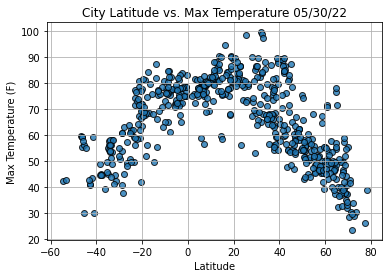

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()